# Weather Regrouped Data Predictions - Clustering

Working in Python 3.9.12 and the Package versions are:
- pandas: 1.5.3
- numpy: 1.23.5
- matplotlib: 3.9.2
- seaborn: 0.13.2
- scikit-learn: 1.2.2

### Define the Problem
Can the Weather be grouped according to its Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, and Press_kPa?

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Import Data

I found this dataset on kaggle - https://www.kaggle.com/code/esraameslamsayed/eda-for-weather-dataset-for-beginners/log. I added an aditional column Weather_Regrouped and manually regrouped the weather descriptions.
It does not state any descriptive factors about where this data is from or when it was captured.

In [2]:
raw_data = pd.read_csv('Weather Data Regrouped.csv')
raw_data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Weather_Regrouped
0,1/3/2012,-16.9,-24.8,50,24,25.0,101.74,Clear,Clear
1,1/5/2012,-7.1,-14.4,56,11,25.0,100.71,Clear,Clear
2,1/5/2012,-9.2,-15.4,61,7,25.0,100.80,Clear,Clear
3,1/5/2012,-9.8,-15.7,62,9,25.0,100.83,Clear,Clear
4,1/5/2012,-9.0,-14.8,63,13,25.0,100.83,Clear,Clear
...,...,...,...,...,...,...,...,...,...
8763,9/14/2012,16.5,15.8,96,22,16.1,101.06,"Thunderstorms,Rain Showers",Rain
8764,6/29/2012,19.5,16.1,81,7,9.7,99.71,"Thunderstorms,Rain Showers,Fog",Rain
8765,7/17/2012,22.9,21.3,91,17,9.7,99.84,"Thunderstorms,Rain Showers,Fog",Rain
8766,7/31/2012,22.4,18.7,80,35,9.7,100.64,"Thunderstorms,Rain Showers,Fog",Rain


In [3]:
# Create a copy of the data
data = raw_data.copy()

# Preprocessing
---

In [4]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8768.000000,8768.000000,8768.000000,8768.000000,8768.000000,8768.000000
mean,8.814564,2.565385,67.405794,14.953695,27.700639,101.050837
std,11.689317,10.886905,16.922310,8.692504,12.605516,0.843740
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.350000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.580000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          8768 non-null   object 
 1   Temp_C             8768 non-null   float64
 2   Dew Point Temp_C   8768 non-null   float64
 3   Rel Hum_%          8768 non-null   int64  
 4   Wind Speed_km/h    8768 non-null   int64  
 5   Visibility_km      8768 non-null   float64
 6   Press_kPa          8768 non-null   float64
 7   Weather            8768 non-null   object 
 8   Weather_Regrouped  8768 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 616.6+ KB


In [6]:
data.groupby('Weather_Regrouped').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_Regrouped,,,,,,
Clear,10.343823,2.846008,62.147145,12.758741,32.676282,101.379659
Cloudy,9.389334,2.787411,65.511193,15.956545,29.147617,100.973476
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Mixed Conditions,-2.152857,-4.072857,86.757143,20.028571,8.462857,100.191143
Rain,10.557667,7.872346,84.368283,16.985583,16.314548,100.384889
Snow,-4.344424,-7.290288,80.377698,20.116906,10.940827,100.535612


In [7]:
# unique values of Weather_Regrouped & count
data['Weather_Regrouped'].value_counts()

Cloudy                       3797
Clear                        3432
Rain                          763
Snow                          556
Fog                           150
Freezing Mixed Conditions      70
Name: Weather_Regrouped, dtype: int64

### Balance the Dataset via Random Undersampling
As there is not a balanced selection for each weather feature, it is best to balance the dataset. Random undersampling involves removing random instances from the majority class until a balance is achieved.

In [8]:
# Create a copy of the dataset
unbalanced_data = data.copy()

In [9]:
unbalanced_data.count()

Date/Time            8768
Temp_C               8768
Dew Point Temp_C     8768
Rel Hum_%            8768
Wind Speed_km/h      8768
Visibility_km        8768
Press_kPa            8768
Weather              8768
Weather_Regrouped    8768
dtype: int64

In [10]:
from sklearn.utils import resample

minority_class = unbalanced_data[unbalanced_data['Weather_Regrouped'] == 'Freezing Mixed Conditions']
majority_class1 = unbalanced_data[unbalanced_data['Weather_Regrouped'] == 'Cloudy']
majority_class2 = unbalanced_data[unbalanced_data['Weather_Regrouped'] == 'Clear']
majority_class3 = unbalanced_data[unbalanced_data['Weather_Regrouped'] == 'Rain']
majority_class4 = unbalanced_data[unbalanced_data['Weather_Regrouped'] == 'Snow']
majority_class5 = unbalanced_data[unbalanced_data['Weather_Regrouped'] == 'Fog']

# Downsample the majority class
majority1_downsampled = resample(majority_class1, replace=False, n_samples=len(minority_class), random_state=42)
majority2_downsampled = resample(majority_class2, replace=False, n_samples=len(minority_class), random_state=42)
majority3_downsampled = resample(majority_class3, replace=False, n_samples=len(minority_class), random_state=42)
majority4_downsampled = resample(majority_class4, replace=False, n_samples=len(minority_class), random_state=42)
majority5_downsampled = resample(majority_class5, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([minority_class, majority1_downsampled, majority2_downsampled, majority3_downsampled, majority4_downsampled, majority5_downsampled])

In [11]:
# Check rebalanced data
balanced_data['Weather_Regrouped'].value_counts()

Freezing Mixed Conditions    70
Cloudy                       70
Clear                        70
Rain                         70
Snow                         70
Fog                          70
Name: Weather_Regrouped, dtype: int64

In [12]:
# Reset index
balanced_data = balanced_data.reset_index(drop=True)

In [13]:
# Rearrange Columns
balanced_data = balanced_data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km', 'Press_kPa',
             'Wind Speed_km/h','Weather_Regrouped', 'Weather','Date/Time']]
balanced_data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Weather_Regrouped,Weather,Date/Time
0,0.4,-0.7,92,4.0,100.79,20,Freezing Mixed Conditions,"Drizzle,Ice Pellets,Fog",12/17/2012
1,-5.4,-7.7,84,9.7,100.08,9,Freezing Mixed Conditions,Freezing Drizzle,1/7/2012
2,-5.5,-7.8,84,9.7,100.05,13,Freezing Mixed Conditions,Freezing Drizzle,1/7/2012
3,-4.8,-7.2,83,12.9,98.44,26,Freezing Mixed Conditions,Freezing Drizzle,1/13/2012
4,-9.0,-12.2,78,6.4,100.80,6,Freezing Mixed Conditions,Freezing Drizzle,1/17/2012


### Select the Features

In [14]:
# Create a copy of that data and remove all parameters apart from the numeric variables.
x = balanced_data.iloc[:,:6]
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h
0,0.4,-0.7,92,4.0,100.79,20
1,-5.4,-7.7,84,9.7,100.08,9
2,-5.5,-7.8,84,9.7,100.05,13
3,-4.8,-7.2,83,12.9,98.44,26
4,-9.0,-12.2,78,6.4,100.80,6
...,...,...,...,...,...,...
415,1.0,0.6,97,9.7,101.89,15
416,12.0,11.8,99,4.0,101.57,7
417,11.9,10.6,92,9.7,101.41,9
418,2.7,2.5,99,0.2,102.09,4


### Scale/ Standardize the Features

In [15]:
from sklearn import preprocessing
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.4212138 , -0.15894227,  0.85891999, -1.03241858,  0.03757624,
         0.43105442],
       [-1.01566186, -0.91827   ,  0.34366001, -0.57763541, -0.70894179,
        -0.65421612],
       [-1.02591097, -0.92911754,  0.34366001, -0.57763541, -0.74048481,
        -0.25957228],
       ...,
       [ 0.75743323,  1.06682963,  0.85891999, -0.57763541,  0.68946523,
        -0.65421612],
       [-0.18548439,  0.18817897,  1.30977248, -1.33560736,  1.40444025,
        -1.14752091],
       [ 1.16739742,  1.51157873,  0.92332749, -0.57763541,  0.51072148,
        -1.14752091]])

# Clustering
---

Manually choosing numbers of clusters

In [16]:
# Object kmeans with a total of 4 clusters
kmeans = KMeans(5, n_init='auto')
# Fit the data
kmeans.fit(x_scaled)

KMeans(n_clusters=5, n_init='auto')

### Clustering the Results

In [17]:
# Create a variable containing the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x_scaled)

In [18]:
weather_data = balanced_data.iloc[:,0:7]
# Create a copy of the data
data_with_clusters = weather_data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Weather_Regrouped,Cluster
0,0.4,-0.7,92,4.0,100.79,20,Freezing Mixed Conditions,3
1,-5.4,-7.7,84,9.7,100.08,9,Freezing Mixed Conditions,1
2,-5.5,-7.8,84,9.7,100.05,13,Freezing Mixed Conditions,1
3,-4.8,-7.2,83,12.9,98.44,26,Freezing Mixed Conditions,2
4,-9.0,-12.2,78,6.4,100.80,6,Freezing Mixed Conditions,1
...,...,...,...,...,...,...,...,...
415,1.0,0.6,97,9.7,101.89,15,Fog,3
416,12.0,11.8,99,4.0,101.57,7,Fog,3
417,11.9,10.6,92,9.7,101.41,9,Fog,3
418,2.7,2.5,99,0.2,102.09,4,Fog,3


In [19]:
# View a randomized sample
random_results = data_with_clusters.sample(n=70, random_state=42)
random_results.head(15)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Visibility_km,Press_kPa,Wind Speed_km/h,Weather_Regrouped,Cluster
145,23.2,13.9,56,25.0,100.50,35,Clear,4
334,-8.5,-12.2,75,4.8,101.62,32,Snow,1
175,18.1,13.0,72,25.0,100.69,13,Clear,4
369,6.7,6.6,99,8.0,100.70,11,Fog,3
416,12.0,11.8,99,4.0,101.57,7,Fog,3
73,23.0,17.3,70,24.1,100.37,17,Cloudy,4
132,12.0,6.0,67,25.0,100.94,19,Cloudy,4
137,0.7,-5.4,64,24.1,100.36,26,Cloudy,2
30,-6.5,-9.0,82,4.8,100.56,15,Freezing Mixed Conditions,1
72,10.2,7.4,83,25.0,100.72,33,Cloudy,2


## Selecting the Number of Clusters with WCSS

Within-cluster sum of squares WCSS is a measure used within the ANOVA framework. It helps evaluate the variation both between clusters and within clusters, offering a useful guideline for determining the optimal number of clusters.

In [ ]:
# Createa an empty list
wcss =[]
cl_num = 11

# Create all possible cluster solutions with a loop
for i in range(1,cl_num):
    # Cluster solution with i clusters
    kmeans = KMeans(i, n_init='auto')
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
wcss

[2519.9999999999995,
 1867.4421377897543,
 1522.7121724770927,
 1277.8133292696666,
 1122.1488454123455,
 1039.3875473295584,
 957.9940035733762,
 851.6557023750421,
 830.08026221913,
 810.3291051080514]

### Plot the Elbow

The "elbow" point on the plot, where the rate of decrease in WCSS slows down, is often considered the optimal number of clusters

Text(0, 0.5, 'Within-cluster Sum of Squares')

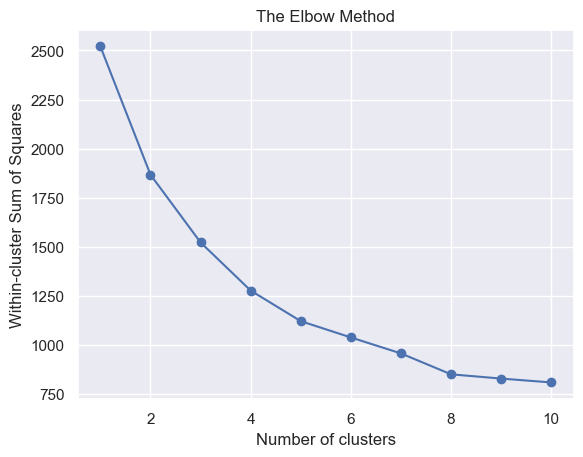

In [21]:
number_clusters = range(1,cl_num)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss,  marker='o')
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

By looking at the Elbow, the point on the plot where the rate of decrease in WCSS slows down is looking like 8.

In [22]:
kmeans_new = KMeans(8, n_init='auto')
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = weather_data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
# includes the original values & predictions based on standardized data
# Convert entire data frame as string and print
print(clusters_new[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Visibility_km', 'Press_kPa', 'Weather_Regrouped',
       'cluster_pred']].to_string())

     Temp_C  Dew Point Temp_C  Rel Hum_%  Visibility_km  Press_kPa          Weather_Regrouped  cluster_pred
0       0.4              -0.7         92            4.0     100.79  Freezing Mixed Conditions             1
1      -5.4              -7.7         84            9.7     100.08  Freezing Mixed Conditions             3
2      -5.5              -7.8         84            9.7     100.05  Freezing Mixed Conditions             3
3      -4.8              -7.2         83           12.9      98.44  Freezing Mixed Conditions             4
4      -9.0             -12.2         78            6.4     100.80  Freezing Mixed Conditions             3
5      -6.8              -9.3         82            4.8     100.61  Freezing Mixed Conditions             3
6      -5.8              -8.5         81            8.0     100.42  Freezing Mixed Conditions             3
7      -2.3              -3.3         93           12.9     101.02  Freezing Mixed Conditions             6
8      -1.8              -3.

### Interpretation of the Silhouette Score
- High Silhouette Score (close to 1): Clusters are well separated and dense.
- Low Silhouette Score (close to 0): Clusters overlap or the clustering result is unclear.
- Negative Silhouette Score: Clusters might be incorrectly assigned.

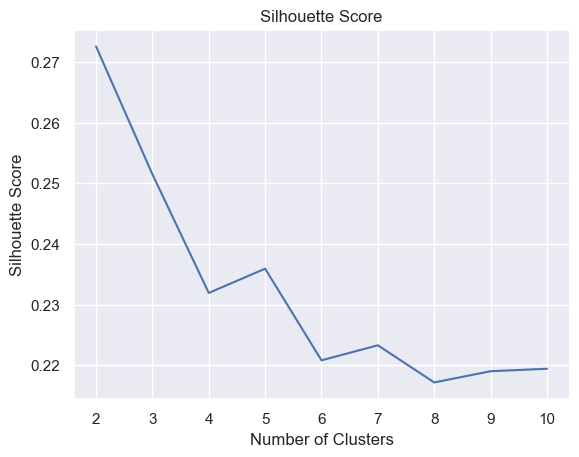

In [25]:
# Plot the Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x_scaled, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [26]:
# Silhouette Score with 8 clusters
silhouette_score(x_scaled,kmeans_new.fit_predict(x_scaled))

0.21163093777070224

With a Silhouette Score ranging from a little over 0.27 to less than 0.22 for 2 - 10 clusters, I would argue the clustering of this data to predict Weather Forecasts is not highly reliable. 